# Ecuaciones diferenciales ordinarias



Las ecuaciones diferenciales ordinarias (EDO) son ecuaciones que involucran derivadas de una función desconocida respecto a una sola variable. Un ejemplo sencillo y familiar es la segunda ley de Newton
$$ m\frac{d^2x}{dt^2}= F(x) $$
en la que la función desconocida es $x(t)$ y derivamos respecto al tiempo $t$ dos veces.

Se habla de ecuaciones *ordinarias* para distinguirlas de las ecuaciones en derivadas parciales en las que aparecen derivadas respecto a más de una variable.

 El *orden* de una EDO se determina por la derivada más alta presente en la ecuación. En el caso de la segunda ley, tenemos una EDO de segundo orden, pero podemos escribirla como un sistema de dos ecuaciones de primer orden introduciendo el momento lineal $p=m\frac{dx}{dt}$:
 $$
 \begin{align}
 \frac{dx}{dt} &=\frac{p}{m}\\
 \frac{dp}{dt} &=F(x)\\
 \end{align}
 $$
y obtenemos las ecuaciones de Hamilton para una partícula de masa $m$ que sufre una fuerza $F(x)$.

Esta reducción a un sistema de ecuaciones de primer orden se puede hacer en general y es lo que se hace habitualmente para resolver numéricamente este tipo de problemas. Se agregan nuevas variables y se reducen las EDOs de orden superior a sistemas de EDO de primer orden.


El problema que nos interesa es entonces integrar numéricamente el siguiente sistema de $N$ ecuaciones diferenciales ordinarias de primer orden:
$$ \frac{d\mathbf{y(x)}}{dx}= \mathbf{f}(\mathbf{y}(x),x) $$
para obtener $\mathbf{y}(x)$ en un intervalo de valores de $x$: $[x_0, x_0+L]$.
Estamos usando la notación usual en la que la variable independiente es $x$ (**atención**: juega el rol del tiempo en la segunda ley).
La **negrita** en la $\mathbf{y}$ y en la $\mathbf{f}$ indican que tanto $\mathbf{y}$ como $\mathbf{f}$ son vectores de $N$ componentes:
$$
\mathbf{y}(x)=(y^{(1)}(x), y^{(2)}(x), \ldots, y^{(N)}(x))
$$
y
$$
\mathbf{f}(\mathbf{y}(x),x)=(f^{(1)}(\mathbf{y}(x),x),f^{(2)}(\mathbf{y}(x),x),\ldots,f^{(N)}(\mathbf{y}(x),x))
$$



## Método de Euler directo


Veamos primero el caso de una sola de estas ecuaciones:
$$ \frac{dy(x)}{dx}= f(y(x),x)$$
con la condición inicial $y(x_0)=y_0$.

Consideramos $n$ valores de $x$:  $(x_0,\, x_1,\ldots,\, x_{n-1})$ y por el momento suponemos que la distancia (discretización $h=\frac{L}{n-1}$) entre dos valores de $x$ es una constante $h=x_{j+1}-x_j$, independiente de $j$.
Definimos también $y_j=y(x_j)$.

Haciendo diferencias finitas (derivada avanzada) tenemos:
$$\left.\frac{dy(x)}{dx}\right|_{x=x_j}= \frac{y(x_j+h)-y(x_j)}{h}+ \mathcal{O}(h)\equiv \frac{y_{j+1}-y_j}{h}+ \mathcal{O}(h)$$
Despejando $y_{j+1}$:
$$y_{j+1}= y_j + h f(y_j,x_j)+ \mathcal{O}(h^2).$$

Este es el método de Euler (directo, hacia adelante o Euler a secas) y permite comenzar con la condición inicial $y_0$ y obtener todos los $y_j$ de manera iterativa:
\begin{align}
y_1 &= y_0 + h f(y_0,x_0)\\
y_2 &= y_1 + h f(y_1,x_1)\\
&\ldots
\end{align}
pero cada paso tiene un error $\mathcal{O}(h^2)$ esto es:
\begin{align}
y_1 &\approx y_0 + h f(y_0,x_0) + a_0 h^2\\
y_2 &\approx y_1 + h f(y_1,x_1) + a_1 h^2\\
&\ldots
\end{align}
Si reemplazamos $y_1$ en la segunda ecuación teniendo en cuenta el error tenemos:
$$
y_2 =  y_0 + hf(y_0,x_0)+ h f(y_1,x_1) + a_0 h^2+ a_1 h ^2
$$
como $f(y_1,x_1)$ está multiplicada por $h$, la contribución a $y_2$ por el error en $y_1$ es de orden $h^3$.

Para el punto final se acumulan los errores
$$
y_{n-1} =  y_0 + h\sum_{i=0}^{n-2} f(y_i,x_i) + \sum_{i=0}^{n-2} a_i h^2
$$

Vemos que el error en el punto final depende del número de pasos $n$, esto es de la discretización $h$ de la variable independiente. Si se achica el $h$ para disminuir el error aumenta el número de pasos.
$$
\sum_{i=0}^{n-1} a_i h^2 \geq n a h^2 = \frac{L}{h} a h^2 =a'h
$$
donde $a$ es algún número que elegimos apropiadamente y $a'= L a$.

Como los errores se van acumulando a cada paso de la iteración, al llegar a $y_n$ el error acumulado va a ser $\mathcal{O}(h)$. Por esta razón se considera al método de Euler como de primer orden en $h$.

Podemos disminuir el error reduciendo $h$ pero en muchos caso es conveniente usar métodos de orden superior que permiten reducirlo sin aumentar el costo computacional excesivamente. En general el mayor costo computacional viene de la evaluación de la función $f(y,x)$ y reducir el $h$ implica aumentar de manera inversamente proporcional el número de evaluaciones.

Este método puede generalizar a sistemas de más de una ecuación de manera directa:

$$\mathbf{y}_{j+1}= \mathbf{y}_j + h \mathbf{f}(\mathbf{y}_j,x_j).$$


###Ejemplo de uso de Euler directo

Resolvemos:
$$
\frac{d y(x)}{dx}=y\sin^2(x)
$$
para la condición inicial $y(0)=2$ en el intervalo $[0,5]$.

La solución exacta es:
$$
y(x) = 2.0  e^{\frac{1}{2}[x-\cos(x)\sin(x)]}
$$

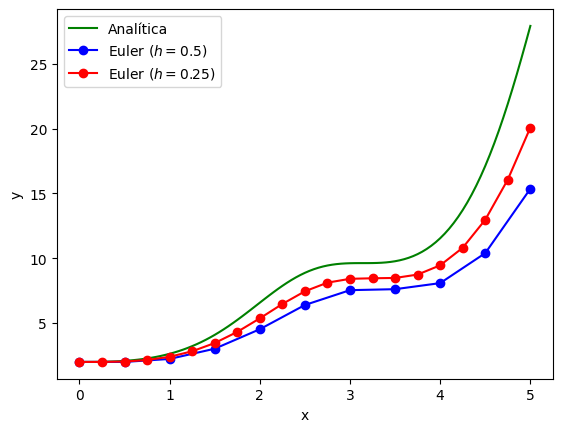

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x, y):
    # Define la función f(x,y)
    return y * np.sin(x)**2

def solucion(xj):
    # Solución analítica de f = y * sin(x)**2, x0=0 , y0=2
    return 2.0 * np.exp(0.5*(xj-np.cos(xj)*np.sin(xj)))

def euler(n, x0, y0, L):
    h = L/n
    #Euler
    xe = np.zeros(n+1)
    ye = np.zeros(n+1)
    xe[0] = x0
    ye[0] = y0

    for i in range(n):
        ye[i+1] = ye[i] + h * f1(xe[i], ye[i])
        xe[i+1] = xe[i] + h

    return xe, ye

def grafica(xa, ye, xe, ye2, xe2, h):
    # Plot
    plt.plot(xa, solucion(xa), 'g-', label='Analítica')
    plt.plot(xe, ye, 'ob-', label='Euler ($h=$'+ str(h) +')')
    plt.plot(xe2, ye2, 'or-', label='Euler ($h=$'+ str(h/2) +')')
    plt.legend(loc ="upper left")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Parametros
x0 = 0
y0 = 2
L = 5
n = 10
h = L/n
xa = np.arange(x0, x0+L+0.05, 0.05) # para graficar la solución analítica

xe, ye = euler(n, x0, y0, L)
xe2, ye2 = euler(2 * n, x0, y0, L)
grafica(xa, ye, xe, ye2, xe2, h)





### Oscilador armónico amortiguado con Euler directo



La ecuación de movimiento para un oscilador armónico amortiguado:
$$ m \frac{d^2x}{dt^2} = - b \frac{dx}{dt} - kx$$
es ecuación diferencial ordinaria (EDO) de segundo orden
donde $m$ es la masa, $b$ es la constante de amortiguación,
y $k$ es la constante del resorte.

Esta EDO de segundo orden se puede convertir en un sistema de dos EDOs de primer orden:

$$
\begin{align}
\frac{dx}{dt} &= v\\
\frac{dv}{dt} &= -\frac{b}{m} v - \frac{k}{m} x
\end{align}
$$

En el código siguiente consideramos $m = 1$, $b = 0.05$, y $k = 1$, con condiciones iniciales $x(0) = 1$ y $v(0) = 0$.





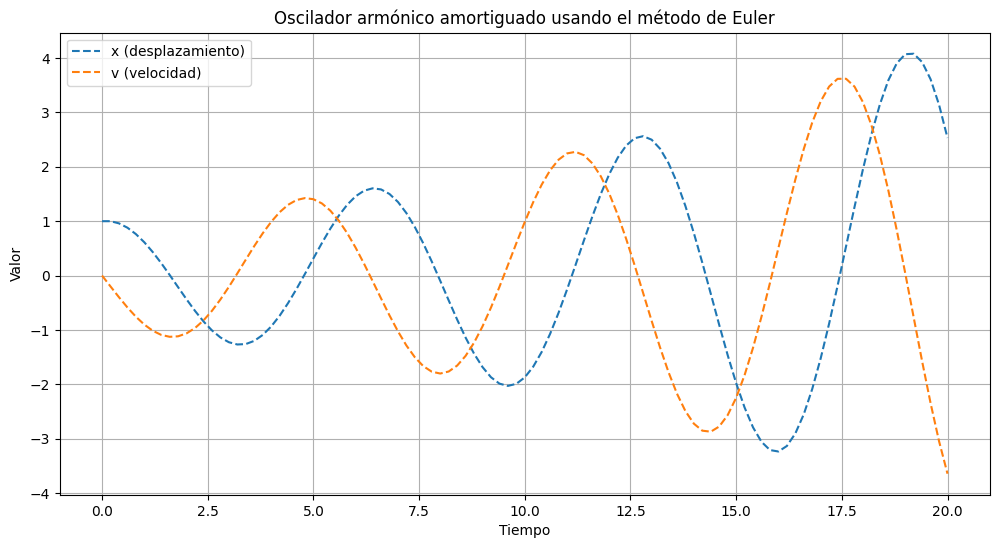

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# El sistema de EDOs
def f(y, t):
    x, v = y
    dxdt = v
    dvdt = -0.05 * v - x  # m = 1, b = 0.05, k = 1
    return np.array([dxdt, dvdt])

# El método de Euler generico
def Euler(f, y0, t):
    y = np.zeros((len(t), len(y0))) # Matriz de (Num pasos de tiempo x Num ecuaciones)
    y[0] = y0
    h = t[1] - t[0]  # Suponemos un espaciado uniforme
    for n in range(0, len(t)-1):
        y[n+1] = y[n] + h*f(y[n], t[n])
    return y

# Usamos el método de Euler
t = np.linspace(0, 20, 101)  # Valores de tiempo
y0 = np.array([1, 0])  # Condiciones iniciales
y_euler = Euler(f, y0, t)

# Graficamos la solución
plt.figure(figsize=(12, 6))
plt.plot(t, y_euler[:, 0], '--', label='x (desplazamiento)')
plt.plot(t, y_euler[:, 1], '--', label='v (velocidad)')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Oscilador armónico amortiguado usando el método de Euler')
plt.grid(True)
plt.show()


Aunque parece que nos equivocamos en el signo de la constante de amortiguación, esto no es así...

Este sistema se vuelve inestable con el método de Euler cuando el paso de tiempo es demasiado grande.

* La cosa mejora si se usa un paso de tiempo más chico, pero eso tiene un costo computacional asociado.

Existe una categoría de métodos llamados implícitos que pueden ser más estables para algunos problemas.

## Euler implícito



Comenzamos con una ecuación diferencial ordinaria:

\begin{equation}
\frac{dy}{dx} = f(y, x).
\end{equation}

La forma integral de esta ecuación en un intervalo $[x_j, x_{j+1}]$ es:

\begin{equation}
\int_{x_j}^{x_{j+1}} dy = \int_{x_j}^{x_{j+1}} f(y, x) dx.
\end{equation}

Integramos el lado izquierdo para obtener:

\begin{equation}
y(x_{j+1}) - y(x_j) = \int_{x_j}^{x_{j+1}} f(y, x) dx.
\end{equation}

Aproximamos la integral en el lado derecho usando la regla del rectángulo para la integración con el valor de la función al final del intervalo (es decir, en $x_{j+1}$), obtenemos:

\begin{equation}
y(x_{j+1}) - y(x_j) \approx h  f(y_{j+1}, x_{j+1}),
\end{equation}

donde $h=x_{j+1} - x_j$ como el punto anterior. Reorganizamos para obtener el método de Euler implícito:

\begin{equation}
y_{j+1} = y_j + h  f(y_{j+1}, x_{j+1}).
\end{equation}

Es un método implícito porque $y_{j+1}$ se define a través de una ecuación que hay que resolver, en general con algún método numérico (por ejemplo Newton-Raphson, o en este caso la función `fsolve` de `scipy`). ¿De qué orden en $h$ es el método de Euler implícito?




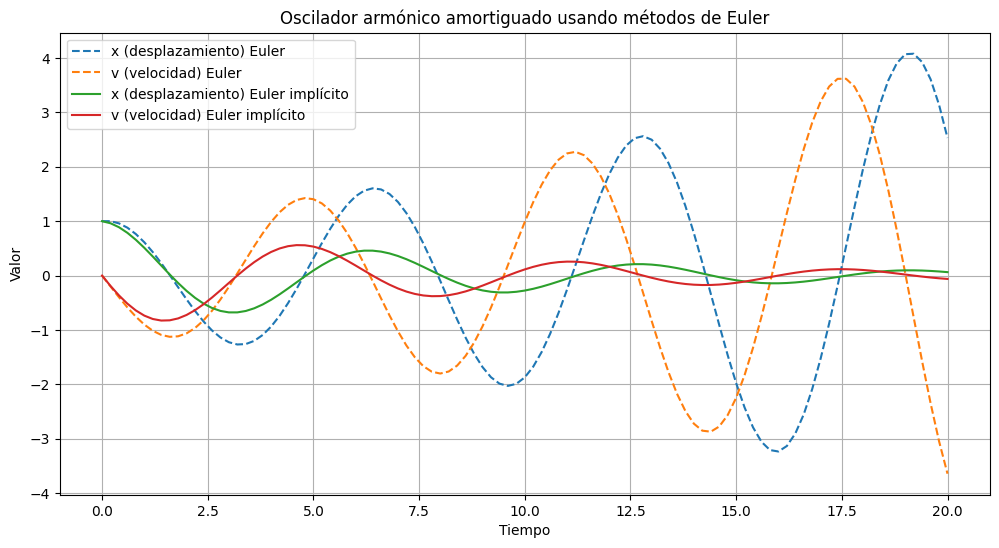

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# El sistema de EDOs
def f(y, t):
    x, v = y
    dxdt = v
    dvdt = -0.05 * v - x  # m = 1, b = 0.05, k = 1
    return np.array([dxdt, dvdt])

# Las ecuaciones implícitas para el método de Euler
def g(y, t, y_prev, h):
    return y - h*f(y, t) - y_prev

# El método de Euler implícito
def Euler_impl(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    h = t[1] - t[0]  # Suponemos un espaciado uniforme
    for n in range(0, len(t)-1):
        # Usamos fsolve para resolver las ecuaciones implícitas
        y[n+1] = fsolve(g, y[n], args=(t[n+1], y[n], h))
    return y

# El método de Euler hacia adelante
def Euler_euler(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    h = t[1] - t[0]  # Suponemos un espaciado uniforme
    for n in range(0, len(t)-1):
        y[n+1] = y[n] + h*f(y[n], t[n])
    return y

# Usamos los métodos
t = np.linspace(0, 20, 101)  # Valores de t
y0 = np.array([1, 0])  # Condiciones iniciales
y_Euler_impl = Euler_impl(f, y0, t)
y_Euler = Euler_euler(f, y0, t)

# Graficamos la solución
plt.figure(figsize=(12, 6))
plt.plot(t, y_Euler[:, 0], '--', label='x (desplazamiento) Euler')
plt.plot(t, y_Euler[:, 1], '--', label='v (velocidad) Euler')
plt.plot(t, y_Euler_impl[:, 0], label='x (desplazamiento) Euler implícito')
plt.plot(t, y_Euler_impl[:, 1], label='v (velocidad) Euler implícito')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Oscilador armónico amortiguado usando métodos de Euler')
plt.grid(True)
plt.show()


Los dos métodos de Euler son del mismo orden en $h$. Sin embargo, para el valor de $h$ elegido y para este problema, el método de Euler explícito tiende a amplificar los errores, mientras que eso no ocurre para el Euler implícito. Para este problema el método explícito se vuelve inestable para valores de $h$ suficienemente grandes (es condicionalmente estable). La desventaja del método implícito es que puede ser muy costoso numéricamente resolver el sistema de ecuaciones que aparece a cada paso de iteración.

Hay que tener en cuenta que la estabilidad depende del sistema de EDO que queremos resolver. Podemos comenzar con el método más sencillo y analizar su error, estabilidad y el paso $h$ que necesitamos usar. Dependiendo de los resutados puede ser necesario utilizar un método implícito.

##Métodos de orden superior



Para obtener un método de orden superior podemos hacer el desarrolo en serie de $y$
$$
y_{i+1}=y_i + h y'(x_i) +\frac{h^2}{2!}y''(x_i)+ \mathcal{O}(h^3)
$$
usando la ecuación diferencial para $y$:
$$\frac{dy(x)}{dx}= f(y(x),x)$$
tenemos:

$$
y_{i+1}=y_i + h f(y_i,x_i) +\frac{h^2}{2!}f'(y_i,x_i)+ \mathcal{O}(h^3)
$$

pero:
$$
f'(y,x) = \frac{\partial f}{\partial x}+\frac{\partial f}{\partial y}\frac{\partial y}{\partial x}
$$

por lo que si logramos calcular las derivadas de $f$ obtenemos un método de segundo orden.

Runge y Kutta idearon una expresión que evita el calculo de esas derivadas y sólo requiere evaluaciones de $f$

$$
y_{i+1} = y_i + (a_1 k_1 +a_2 k_2)h
$$
donde
$$
k_1=f(y_i,x_i)
$$

$$
k_2 = f(x_i + p_1 h y_i + q_{11}k_1 h)
$$

donde $a_1$, $a_2$, $p_1$ y $q_{11}$ deben ser elegidos para que el desarrollo en serie de la expresión de Runge-Kutta coincida término a término hasta segundo orden en $h$ con el desarrollo en serie de $y$.

Se obtiene que
$$a_1+a_2=1$$
$$a_2 p_1=\frac{1}{2}$$
y
$$a_2q_{11}=\frac{1}{2}$$
por lo que se puede fijar una de las constantes de manera arbitraria y obtener el resto. Eso da a una variedad de posibles métodos. Si se fija $a_2=\frac{1}{2}$ se obtiene el método de Heun:
$a_1=\frac{1}{2}$, $p_1=q_{11}=1$.

### Método de  Runge-Kutta 4


Se puede continuar con la misma lógica para construir métodos de orden superior.
El método Runge-Kutta 4 es $[\mathcal{O}(h^4)]$ y sólo usa 4 evaluaciones (adecuadamente elegidas) de $f$ para cada paso de integración.
\begin{align}
 k_1 &= \ f(x_j, y_j), \\
 k_2 &= \ f\!\left(x_j + \frac{h}{2}, y_j + h\frac{k_1}{2}\right), \\
 k_3 &= \ f\!\left(x_j + \frac{h}{2}, y_j + h\frac{k_2}{2}\right), \\
 k_4 &= \ f\!\left(x_j + h, y_j + hk_3\right).
\end{align}

Los valores se iteran usando:
\begin{align}
y_{j+1} &= y_j + \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4 \right) + \mathcal{O}(h^5),\\
x_{j+1} &= x_j + h \\
\end{align}

Si $f$ es independiente de $y$, de modo que la ecuación diferencial sea equivalente a una integral simple, entonces RK4 es la famosa [regla de Simpson](https://en.wikipedia.org/wiki/Simpson%27s_rule).

Ver [Wikipedia](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) (en inglés) para un análisis detallado del método RK4 sus variantes y generalizaciones. Incluyendo la demostración de que es de orden $h^4$.

#Ejemplo

Resolvemos:
$$
\frac{d y(x)}{dx}=y\sin^2(x)
$$
para la condición inicial $y(0)=2$ en el intervalo $[0,5]$.

La solución exacta es:
$$
y(x) = 2.0  e^{\frac{1}{2}[x-\cos(x)\sin(x)]}
$$

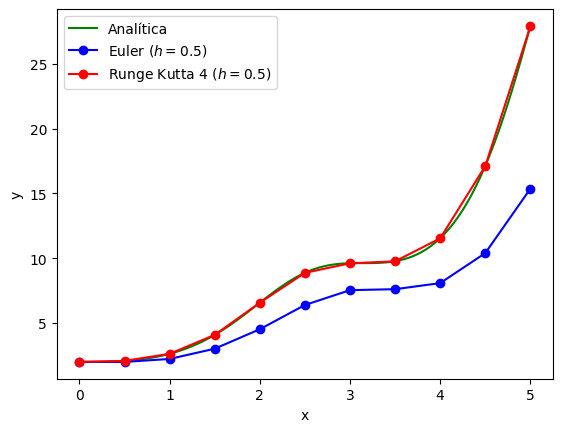

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x, y):
    # Define la función f(x,y)
    return y * np.sin(x)**2

def solucion(xj):
    # Solución analítica de f = y * sin(x)**2, x0=0 , y0=2
    return 2.0 * np.exp(0.5*(xj-np.cos(xj)*np.sin(xj)))

def euler(n, x0, y0, L):
    h = L/n
    #Euler
    xe = np.zeros(n+1)
    ye = np.zeros(n+1)
    xe[0] = x0
    ye[0] = y0

    for i in range(n):
        ye[i+1] = ye[i] + h * f1(xe[i], ye[i])
        xe[i+1] = xe[i] + h

    return xe, ye

def runge_kutta(n, x0, y0, L):
    h = L/n
    #Runge Kutta 4
    xrk = np.zeros(n+1)
    yrk = np.zeros(n+1)

    xrk[0] = x0
    yrk[0] = y0

    for i in range(n):
        k1 = h * f1(xrk[i], yrk[i])
        k2 = h * f1(xrk[i] + h/2, yrk[i] + k1/2)
        k3 = h * f1(xrk[i] + h/2, yrk[i] + k2/2)
        k4 = h * f1(xrk[i] + h, yrk[i] + k3)
        yrk[i+1] = yrk[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        xrk[i+1] = xrk[i] + h

    return xrk, yrk

def plot_results(xa, ye, xe, yrk, xrk, h):
    # Plot
    plt.plot(xa, solucion(xa), 'g-', label='Analítica')
    plt.plot(xe, ye, 'ob-', label='Euler ($h=$'+ str(h) +')')
    plt.plot(xrk, yrk, 'or-', label='Runge Kutta 4 ($h=$'+ str(h) +')')
    plt.legend(loc ="upper left")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Parametros
x0 = 0
y0 = 2
L = 5
n = 10
h = L/n
xa = np.arange(x0, x0+L+0.05, 0.05)

xe, ye = euler(n, x0, y0, L)
xrk, yrk = runge_kutta(n, x0, y0, L)
plot_results(xa, ye, xe, yrk, xrk, h)





Vemos que RK4 tiene un error menor, pero en cada paso evalúa 4 veces la función. ¿Será igual que el error de Euler usando $h/4$?

A la hora de definir la discretización $h$ de la variable independiente, entran varios factores en juego. Pasos muy cortos van a hacer muy lento el cálculo y pasos muy largos pueden hacerlo inestable o con un error demasiado grande.

Una forma de controlar el cálculo (sin conocer la solución exacta) es utilizar diferentes $h$ y ver la diferencia entre las soluciones obtenidas. Podemos establecer una tolerancia para esa diferencia, que es una medida del error en el cálculo.

Una alternativa aún mejor es usar un paso adaptativo. Esto es, realizar la integración usando dos pasos distintos e ir comparando las soluciones (cuando las variables independientes coinciden). Para el método de Euler hacemos un paso $h$:
$$y^{(a)}(x + h)=y^{(a)}(x)+ h f(y^{(a)}(x),x)$$
y dos pasos con $h/2$
$$y^{(b)}(x + h/2)=y^{(b)}(x)+ h/2 f(y^{(b)}(x),x)$$
$$y^{(b)}(x + h)=y^{(b)}(x+h/2)+ h/2 f(y^{(b)}(x+h/2),x+h/2)$$
y comparamos $\Delta=|y^{(b)}(x + h)-y^{(a)}(x + h)|$.

Dependiendo del valor de $\Delta$ comparado con un valor de tolerancia $\epsilon$ decidimos si aumentamos o disminuimos los dos pasos en la misma proporción o los dejamos igual.


### Péndulo doble y librerías de integración

Las ecuaciones de movimiento para un péndulo doble rígido se pueden escribir utilizando el formalismo Lagrangiano. Sean $\theta_1$ y $\theta_2$ los ángulos entre la vertical y las barras de longitudes $L_1$ y $L_2$ respectivamente, con masas $M_1$ y $M_2$ unidas a sus extremos. La aceleración de la gravedad es $g$. El lagrangiano $L$ está dado por la diferencia entre la energía cinética $T$ y la energía potencial $V$ del sistema:

$$
L = T - V
$$

Las energías cinética y potencial son:

$$
T = \frac{1}{2}M_1(L_1\dot{\theta_1})^2 + \frac{1}{2}M_2[(L_1\dot{\theta_1})^2 + (L_2\dot{\theta_2})^2 + 2L_1L_2\dot{\theta_1}\dot{\theta_2}\cos(\theta_1 - \theta_2)]
$$

$$
V = -M_1g L_1\cos\theta_1 - M_2g[L_1\cos\theta_1 + L_2\cos\theta_2]
$$

Las ecuaciones de movimiento se obtienen aplicando las ecuaciones de Euler-Lagrange:

$$
\frac{d}{dt}\frac{\partial L}{\partial\dot{\theta_i}} - \frac{\partial L}{\partial\theta_i} = 0
$$

Aplicando las ecuaciones de Euler-Lagrange para $i = 1, 2$, obtenemos el siguiente sistema de dos ecuaciones diferenciales no lineales de segundo orden:

$$
(M_1 + M_2)L_1\ddot{\theta_1} + M_2L_2\ddot{\theta_2}\cos(\theta_1 - \theta_2) + M_2L_2\dot{\theta_2}^2\sin(\theta_1 - \theta_2) + (M_1 + M_2)g\sin\theta_1 = 0
$$

$$
M_2L_2\ddot{\theta_2} + M_2L_1\ddot{\theta_1}\cos(\theta_1 - \theta_2) - M_2L_1\dot{\theta_1}^2\sin(\theta_1 - \theta_2) + M_2g\sin\theta_2 = 0
$$
Para convertir las dos ecuaciones diferenciales no lineales de segundo orden en un sistema de ecuaciones diferenciales ordinarias (EDO) de primer orden, introducimos nuevas variables $\omega_1$ y $\omega_2$, que representan las velocidades angulares:

$$
\omega_1 = \dot{\theta_1}
$$

$$
\omega_2 = \dot{\theta_2}
$$

Entonces, las ecuaciones de segundo orden se pueden escribir en términos de $\omega_1$ y $\omega_2$:

$$
(M_1 + M_2)L_1\dot{\omega_1} + M_2L_2\dot{\omega_2}\cos(\theta_1 - \theta_2) + M_2L_2\omega_2^2\sin(\theta_1 - \theta_2) + (M_1 + M_2)g\sin\theta_1 = 0
$$

$$
M_2L_2\dot{\omega_2} + M_2L_1\dot{\omega_1}\cos(\theta_1 - \theta_2) - M_2L_1\omega_1^2\sin(\theta_1 - \theta_2) + M_2g\sin\theta_2 = 0
$$

El sistema de EDO de primer orden es el siguiente:

$$
\dot{\theta_1} = \omega_1
$$

$$
\dot{\theta_2} = \omega_2
$$

$$
\dot{\omega_1} = \frac{-M_2L_2\omega_2^2\sin(\theta_1 - \theta_2)\cos(\theta_1 - \theta_2) - M_2g\sin\theta_2\cos(\theta_1 - \theta_2) - (M_1 + M_2)g\sin\theta_1}{(M_1 + M_2)L_1 - M_2L_1\cos^2(\theta_1 - \theta_2)}
$$

$$
\dot{\omega_2} = \frac{(M_1 + M_2)(L_1\omega_1^2\sin(\theta_1 - \theta_2) - g\sin\theta_1\cos(\theta_1 - \theta_2) + g\sin\theta_2)}{L_2 - L_1\cos^2(\theta_1 - \theta_2)}
$$

Este sistema de EDO de primer orden contiene cuatro ecuaciones con cuatro variables dependientes ($\theta_1, \theta_2, \omega_1, \omega_2$) y una variable independiente ($t$).

Vamos a resolverlo usando librerías de integración de Python.

In [ ]:
"""
===========================
El problema del péndulo doble
===========================

Esta animación ilustra el problema del péndulo doble.
"""

# Adaptado de:
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from IPython.display import HTML

G = 9.8  # aceleración debido a la gravedad, en m/s^2
L1 = 1.0  # longitud del péndulo 1 en m
L2 = 0.5  # longitud del péndulo 2 en m
M1 = 1.0  # masa del péndulo 1 en kg
M2 = 0.01  # masa del péndulo 2 en kg

def derivs(estado, t):

    dydx = np.zeros_like(estado)
    dydx[0] = estado[1]

    del_ = estado[2] - estado[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*estado[1]*estado[1]*sin(del_)*cos(del_) +
               M2*G*sin(estado[2])*cos(del_) +
               M2*L2*estado[3]*estado[3]*sin(del_) -
               (M1 + M2)*G*sin(estado[0]))/den1

    dydx[2] = estado[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*estado[3]*estado[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(estado[0])*cos(del_) -
               (M1 + M2)*L1*estado[1]*estado[1]*sin(del_) -
               (M1 + M2)*G*sin(estado[2]))/den2

    return dydx

# crear un arreglo de tiempo desde 0 hasta 100 muestreado en pasos de 0.05 segundos
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 y th2 son los ángulos iniciales (grados)
# w10 y w20 son las velocidades angulares iniciales (grados por segundo)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# estado inicial
estado = np.radians([th1, w1, th2, w2])

# integrar la EDO usando scipy.integrate.
y = integrate.odeint(derivs, estado, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'tiempo = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

plt.close(fig)
#animación
HTML(ani.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.